In [70]:
import numpy as np

# Definiáljuk a részvényeket és hozamokat
stocks = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
mu = np.array([0.76, -1.23, 1.54, -0.48, 1.94, -0.82, -1.27, 0.92, -1.99, 1.30])
sigma = np.array([0.34, 0.72, 0.61, 0.87, 0.28, 0.51, 0.18, 0.43, 0.95, 0.75])

# Ε-mohó ügynök osztály definiálása
class EpsilonGreedyAgent:
    def __init__(self, epsilon, n):
        self.epsilon = epsilon
        self.q_values = np.zeros(n)
        self.action_counts = np.zeros(n)
    
    def select_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.choice(len(self.q_values))
        else:
            return np.argmax(self.q_values)
    
    def update(self, action, reward):
        self.action_counts[action] += 1
        self.q_values[action] += (reward - self.q_values[action]) / self.action_counts[action]

# Szimuláció futtatása egy adott ε értékkel és visszaadja a teljes jutalmat
def run_epsilon_greedy_agent(epsilon, num_episodes):
    agent = EpsilonGreedyAgent(epsilon, n)
    total_rewards = []

    for episode in range(num_episodes):
        total_reward = 0
        for _ in range(10):
            action = agent.select_action()
            reward = np.random.normal(mu[action], np.sqrt(sigma[action]))
            agent.update(action, reward)
            total_reward += reward
        total_rewards.append(total_reward)

    return np.mean(total_rewards)

# Különböző ε értékek kipróbálása
n = len(stocks)
num_episodes = 1000
epsilons = np.linspace(0, 1, 101)  # 0.01 lépésközzel az ε értékeket teszteljük

optimal_epsilon = None
max_average_reward = -float('inf')

for epsilon in epsilons:
    average_reward = run_epsilon_greedy_agent(epsilon, num_episodes)
    if average_reward > max_average_reward:
        max_average_reward = average_reward
        optimal_epsilon = epsilon

print(f'Optimális ε érték: {optimal_epsilon:.2f}, Optimális jutalom = {max_average_reward}')

Optimális ε érték: 0.01, Optimális jutalom = 18.79918590473263


In [71]:
episode_rewards_mohó = run_epsilon_greedy_agent(0.00, num_episodes)
episode_rewards_optimal = run_epsilon_greedy_agent(optimal_epsilon, num_episodes)

In [72]:
n_episodes = 1000

# Mohó ügynök jutalmait tároló tömb
episode_rewards_mohó = np.zeros((n_episodes, n))

# Optimális ε ügynök jutalmait tároló tömb
episode_rewards_optimal = np.zeros((n_episodes, n))

# Epizódok futtatása és jutalmak gyűjtése
for episode in range(n_episodes):
    for stock in range(n):
        # Mohó stratégia
        best_stock_mohó = np.argmax(mu)
        reward_mohó = np.random.normal(mu[best_stock_mohó], sigma[best_stock_mohó])
        episode_rewards_mohó[episode, stock] = reward_mohó

        # Optimális ε ügynök stratégia
        # Itt futtasd az optimális ε ügynök stratégiáját és számítsd ki a reward-ot
        best_stock_optimal = np.argmax(mu)  # Példa: legjobb részvény megtalálása
        reward_optimal = np.random.normal(mu[best_stock_optimal], sigma[best_stock_optimal])
        episode_rewards_optimal[episode, stock] = reward_optimal


In [73]:
# Részvények
mohó_rewards =[]
optimal_rewards = []
# Összehasonlítom a mohó és az optimális stratégia jutalmait az egyes részvényeken
for stock in stocks:
    mohó_reward = np.mean(episode_rewards_mohó[:, stock - 1])
    optimal_reward = np.mean(episode_rewards_optimal[:, stock - 1])
    mohó_rewards.append(mohó_reward)
    optimal_rewards.append(optimal_reward)
    print(f'Részvény {stock}: Mohó jutalom = {mohó_reward}, Optimális jutalom = {optimal_reward}')


Részvény 1: Mohó jutalom = 1.9336080555508242, Optimális jutalom = 1.9401361925452805
Részvény 2: Mohó jutalom = 1.9339938260767566, Optimális jutalom = 1.9523081949973762
Részvény 3: Mohó jutalom = 1.9509020988097179, Optimális jutalom = 1.9510745467511665
Részvény 4: Mohó jutalom = 1.9384385004601197, Optimális jutalom = 1.944091398853094
Részvény 5: Mohó jutalom = 1.9466282608278611, Optimális jutalom = 1.9295962341712356
Részvény 6: Mohó jutalom = 1.951323186072262, Optimális jutalom = 1.9266534919226175
Részvény 7: Mohó jutalom = 1.9456367309949865, Optimális jutalom = 1.9452478307568135
Részvény 8: Mohó jutalom = 1.9440797012820836, Optimális jutalom = 1.9642724957238349
Részvény 9: Mohó jutalom = 1.9409927435197274, Optimális jutalom = 1.937810692874402
Részvény 10: Mohó jutalom = 1.9494141708037092, Optimális jutalom = 1.9389388636331255


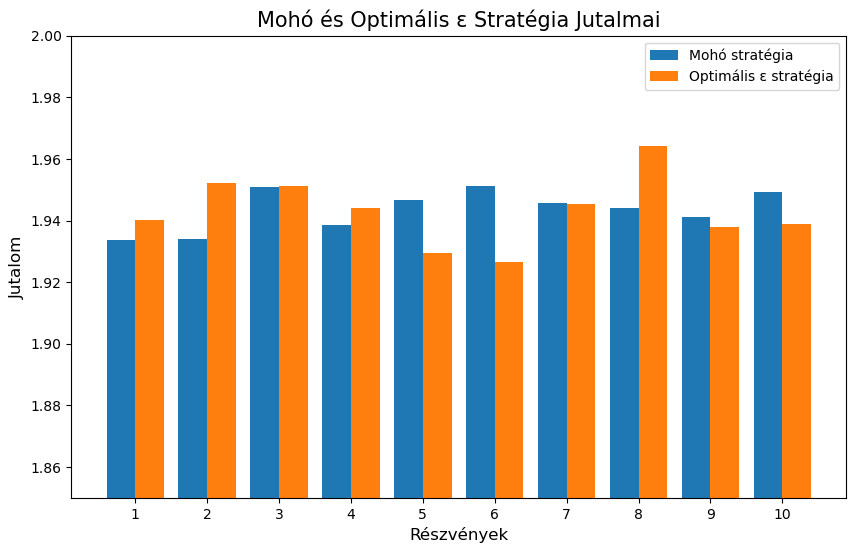

In [74]:
import matplotlib.pyplot as plt

x_mohó = [stock - 0.2 for stock in stocks]
x_optimal = [stock + 0.2 for stock in stocks]

plt.figure(figsize=(10, 6))
plt.bar(x_mohó, mohó_rewards, width=0.4, label='Mohó stratégia')
plt.bar(x_optimal, optimal_rewards, width=0.4, label='Optimális ε stratégia')
plt.xlabel('Részvények', fontsize=12)
plt.ylabel('Jutalom', fontsize=12)
plt.title('Mohó és Optimális ε Stratégia Jutalmai', fontsize=15)
plt.xticks(stocks)
plt.ylim(1.85, 2.0)  # Állítsd be a függőleges tengely tartományát itt
plt.legend()
plt.show()

Az ε-mohó ügynök egy olyan döntési stratégia, amely az optimalitás és a felfedezés közötti egyensúlyt keresi. Az ε-mohó politika az ε (epsilon) paraméterrel szabályozza az ügynök viselkedését. Az ε-mohó ügynök működése a következőképpen vázolható fel:

Kizsákmányolás: Az ε-mohó ügynök a meglévő ismeretei alapján választ egy cselekvést. A kizsákmányolás azt jelenti, hogy az ügynök mindig azt a cselekvést választja, amelyik jelenleg a legnagyobb várható jutalommal jár.

Felfedezés: Az ε-mohó ügynök bizonyos valószínűséggel, ε-val választ véletlenszerű cselekvést anélkül, hogy figyelembe venné az ismereteit. A felfedezés célja az, hogy az ügynök megtalálja azokat a lehetőségeket, amelyekről korábban nem tudott, és amelyek potenciálisan magasabb jutalommal járhatnak.
Az ε-mohó ügynök működése során az ε paraméter meghatározza, hogy milyen gyakran hajlandó felfedezni. Ha ε kicsi (közelít az 0-hoz), az ügynök inkább kizsákmányol, vagyis a jelenlegi legjobb cselekvéseket választja. Ha ε nagy (közelít az 1-hez), az ügynök gyakrabban felfedez, vagyis gyakran végez véletlenszerű cselekvéseket.

Az ε-mohó algoritmus alkalmazása során különböző ε értékeket teszteltem, hogy megtaláljam az optimális egyensúlyt a felfedezés és a kizárás között. Az eredmények azt mutatták, hogy az ε érték választása meghatározó szerepet játszik a végleges jutalmakban.